In [1]:
# Install catalax
# !pip install catalax

In [2]:
import catalax as ctx

# Parameter Optimization with Catalax

This notebook demonstrates how to perform parameter optimization using Catalax. We'll use a Michaelis-Menten kinetics model as an example and fit its parameters to experimental data.

## Overview

The notebook covers:
1. Setting up a Michaelis-Menten kinetic model
2. Loading experimental data from a Croissant dataset
3. Configuring parameters for optimization
4. Running parameter inference using LMFit
5. Analyzing the optimization results

The Michaelis-Menten model describes enzyme kinetics with the equation:


In [3]:
# Initialize the model
model = ctx.Model(name="Michaelis-Menten")

# Add species
model.add_species("s1")

# Add ODEs
model.add_ode("s1", "- (v_max * s1) / ( K_m + s1)")

# Prepare the model for bayes and define priors
model.parameters.v_max.value = 7.0
model.parameters.K_m.value = 100.0

model

,name,symbol
0,s1,s1


,name,symbol,value,constant,initial_value,equation,lower_bound,upper_bound
0,K_m,K_m,100.0,False,None,None,None,None
1,v_max,v_max,7.0,False,None,None,None,None


""



Model(
    name='Michaelis-Menten',
    odes=DottedDict({'s1': ODE(species=Species(name='s1', symbol=s1), equation=-s1*v_max/(K_m + s1), observable=True, parameters=DottedDict({'K_m': Parameter(name='K_m', symbol=K_m, value=100.0, constant=False, identifiability=None, initial_value=None, equation=None, lower_bound=None, upper_bound=None, hdi=None, prior=None), 'v_max': Parameter(name='v_max', symbol=v_max, value=7.0, constant=False, identifiability=None, initial_value=None, equation=None, lower_bound=None, upper_bound=None, hdi=None, prior=None)}))}),
    species=,
    parameters=,
    constants=
)

/Users/janrange/GitHub/Catalax/catalax/dataset/dataset.py:789: UserWarning: The figure layout has changed to tight
  plt.tight_layout(w_pad=4, h_pad=4)


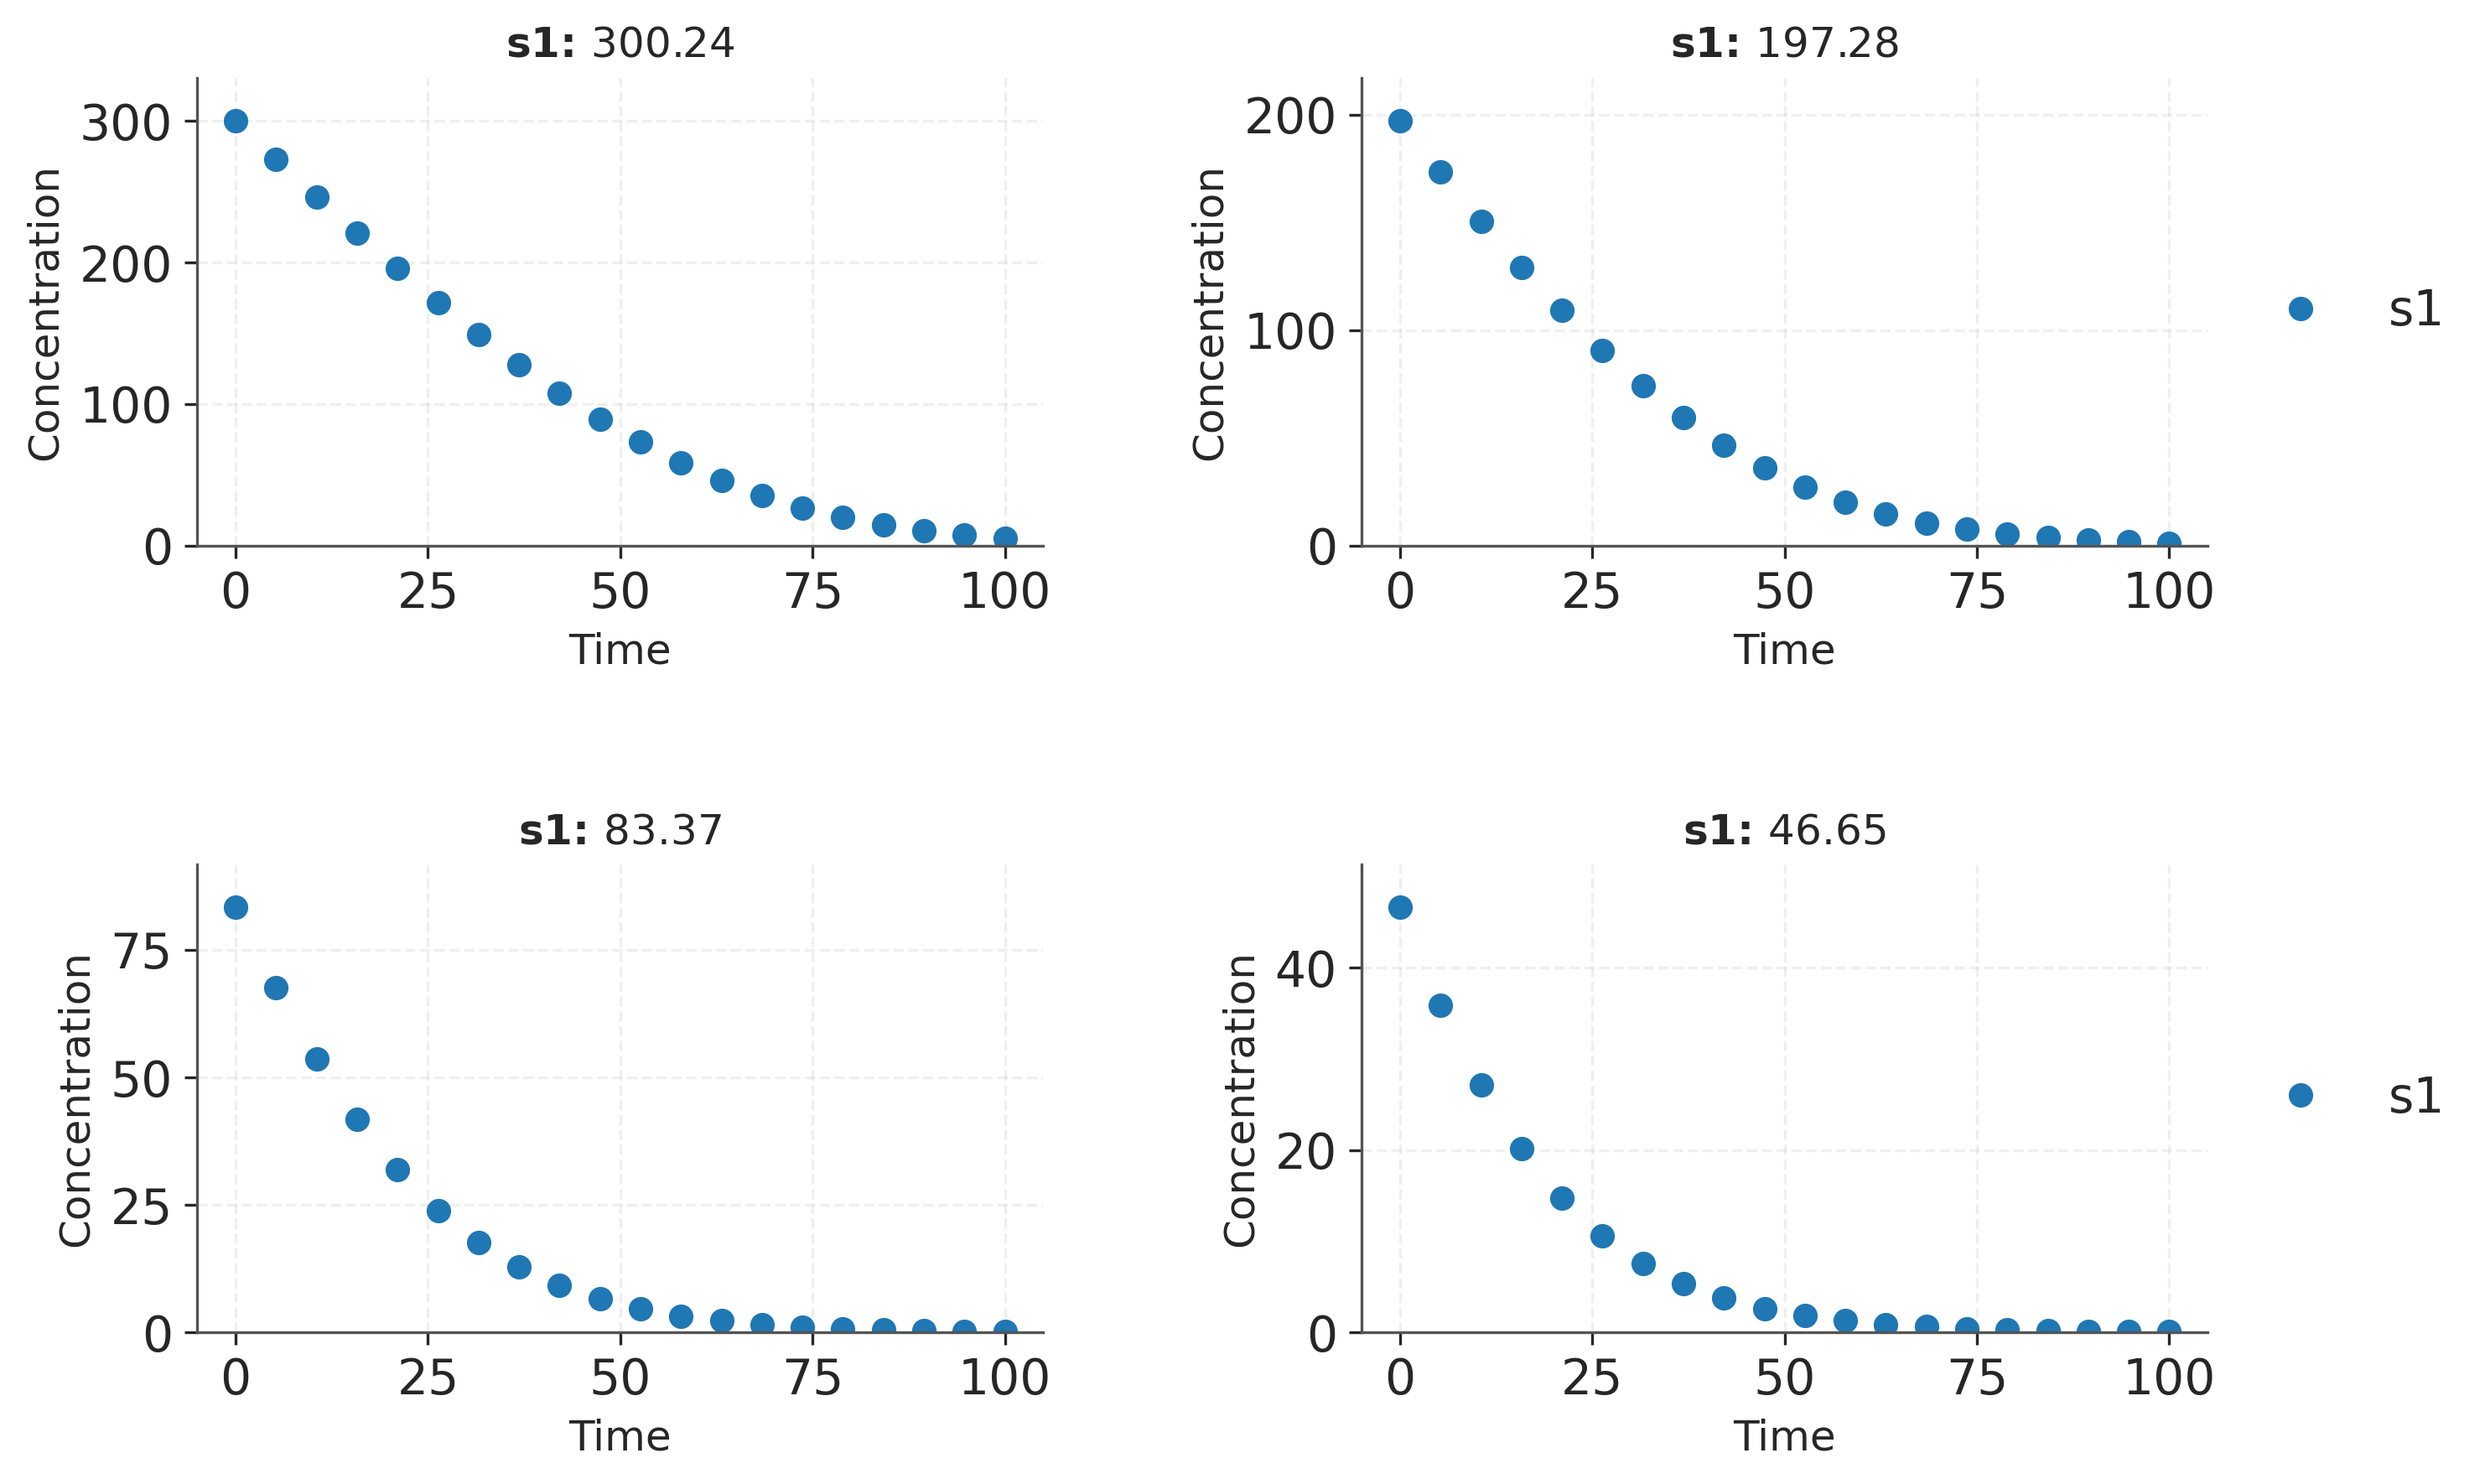

In [4]:
dataset = ctx.Dataset.from_croissant("./datasets/croissant_dataset.zip")
f = dataset.plot(measurement_ids=[m.id for m in dataset.measurements[0:4]])

In [5]:
# In order to perform optimization, we need to add initial values.
model.parameters.v_max.initial_value = 10.0
model.parameters.K_m.initial_value = 120.0

# ... and to make sure to be as realistic as possible.
model.parameters.v_max.value = None
model.parameters.K_m.value = None

In [6]:
# Perform the optimization
result, new_model = ctx.optimize(
    model=model,
    dataset=dataset,
    global_upper_bound=1e5,
    global_lower_bound=1e-6,
    method="lbfgs",
)

<lmfit.minimizer.MinimizerResult object at 0x356995490>

/Users/janrange/GitHub/Catalax/catalax/dataset/dataset.py:789: UserWarning: The figure layout has changed to tight
  plt.tight_layout(w_pad=4, h_pad=4)


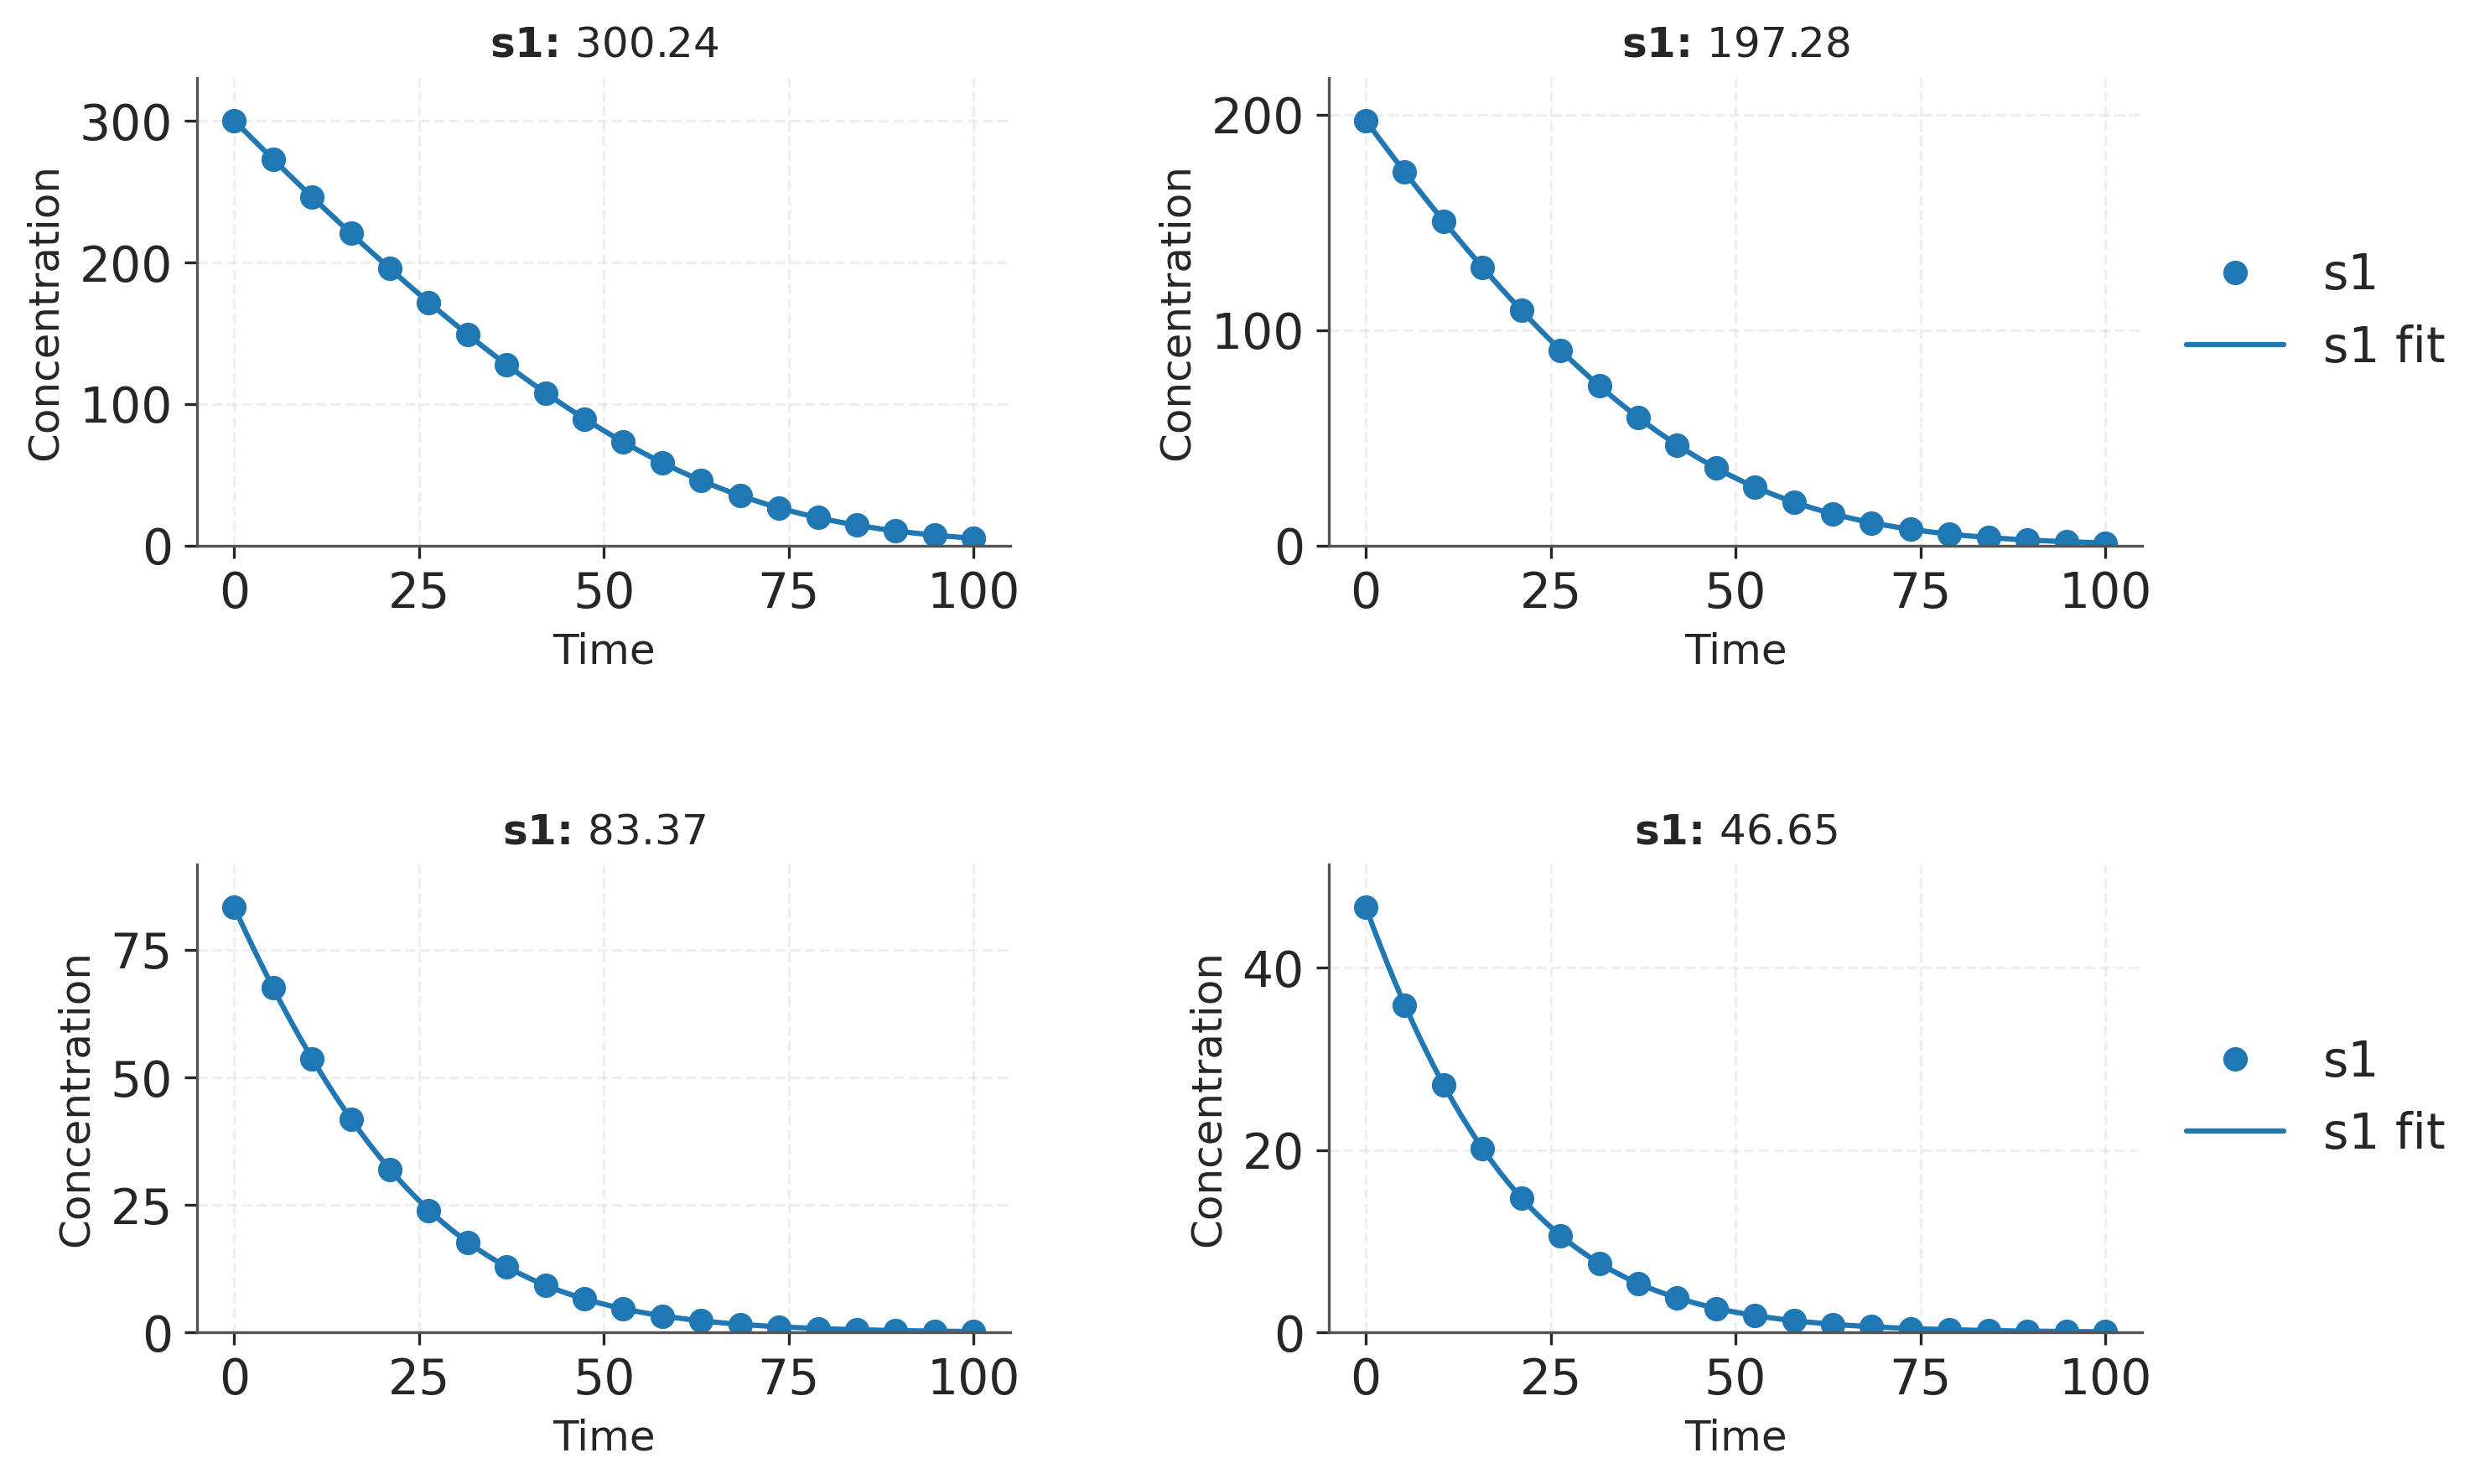

In [9]:
f = dataset.plot(
    predictor=new_model,
    measurement_ids=[m.id for m in dataset.measurements[0:4]],
)